# 6 extend the application scopes of GLM

In [1]:
d <- read.csv("data/glm-book/data4a.csv")

In [3]:
summary(d)

       N           y              x          f     
 Min.   :8   Min.   :0.00   Min.   : 7.660   C:50  
 1st Qu.:8   1st Qu.:3.00   1st Qu.: 9.338   T:50  
 Median :8   Median :6.00   Median : 9.965         
 Mean   :8   Mean   :5.08   Mean   : 9.967         
 3rd Qu.:8   3rd Qu.:8.00   3rd Qu.:10.770         
 Max.   :8   Max.   :8.00   Max.   :12.440         

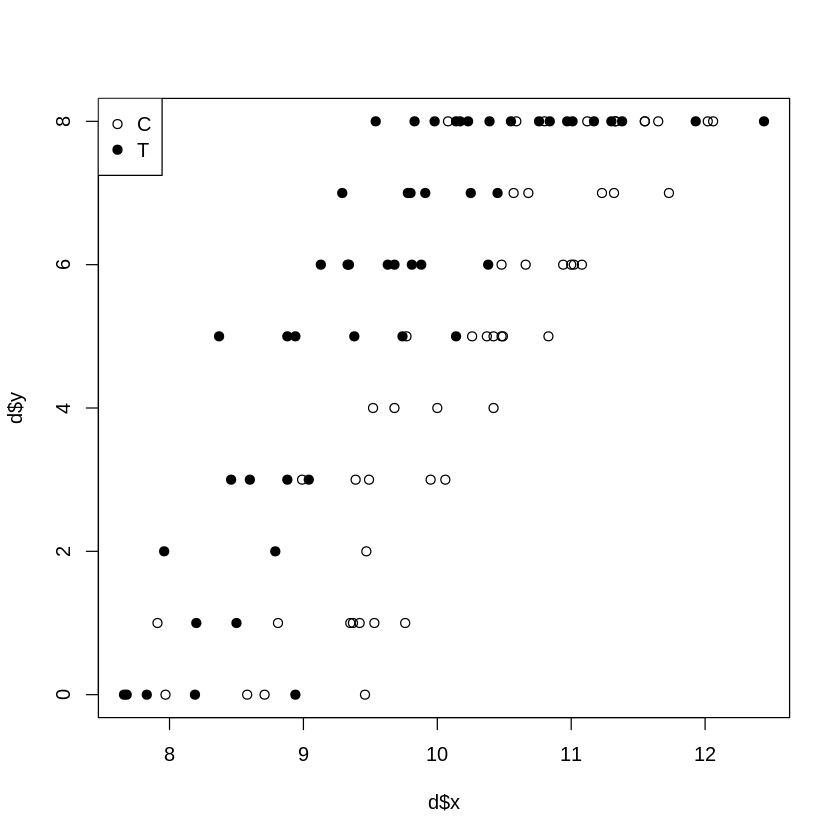

In [5]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
legend("topleft", legend = c("C", "T"), pch = c(21, 19))

## 6.4 logistic regression and logit link function

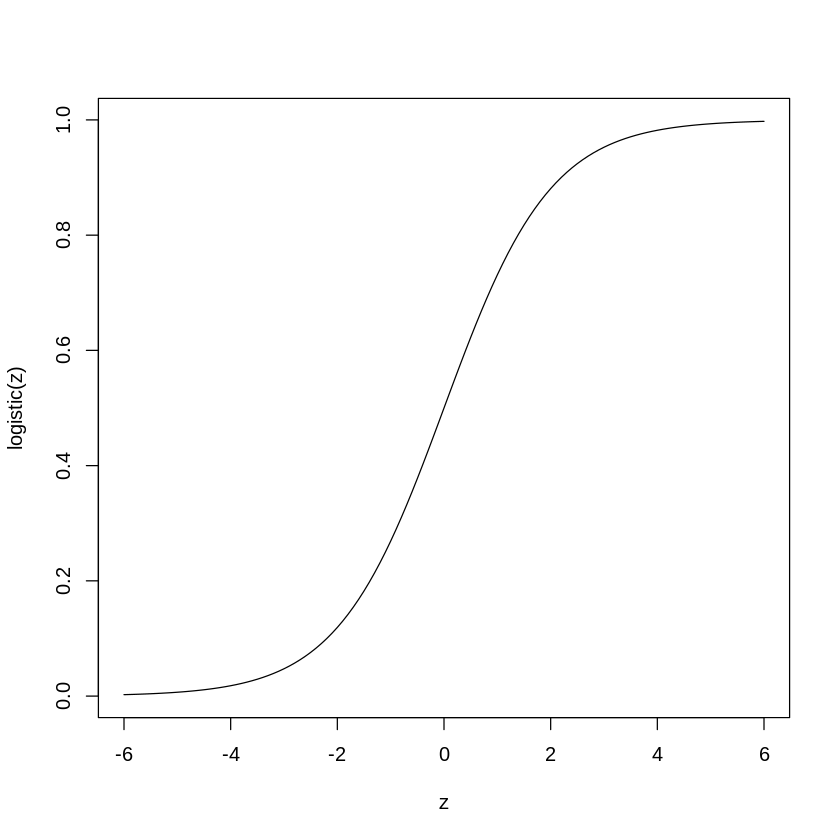

In [6]:
logistic <- function(z) 1 / (1 + exp(-z))
z <- seq(-6, 6, 0.1)
plot(z, logistic(z), type ="l")

In [7]:
glm(cbind(y, N - y) ~ x + f, data = d, family = binomial)


Call:  glm(formula = cbind(y, N - y) ~ x + f, family = binomial, data = d)

Coefficients:
(Intercept)            x           fT  
    -19.536        1.952        2.022  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    499.2 
Residual Deviance: 123 	AIC: 272.2

In [8]:
library(MASS)

In [10]:
fit.xf <- glm(y ~ x + f, data = d, family = poisson)
stepAIC(fit.xf)

Start:  AIC=413.03
y ~ x + f

       Df Deviance    AIC
<none>      92.599 413.03
- f     1  111.304 429.74
- x     1  199.038 517.47



Call:  glm(formula = y ~ x + f, family = poisson, data = d)

Coefficients:
(Intercept)            x           fT  
    -3.0900       0.4425       0.3938  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    202.2 
Residual Deviance: 92.6 	AIC: 413

## 6.5 interaction term

In [12]:
glm(cbind(y, N - y) ~ x * f, data = d, family = binomial)


Call:  glm(formula = cbind(y, N - y) ~ x * f, family = binomial, data = d)

Coefficients:
(Intercept)            x           fT         x:fT  
  -18.52332      1.85251     -0.06376      0.21634  

Degrees of Freedom: 99 Total (i.e. Null);  96 Residual
Null Deviance:	    499.2 
Residual Deviance: 122.4 	AIC: 273.6

## 6.6 offset

In [14]:
d2 <- read.csv("data/glm-book/data4b.csv")
glm(y ~ x, offset = log(A), family = poisson, data = d2)


Call:  glm(formula = y ~ x, family = poisson, data = d2, offset = log(A))

Coefficients:
(Intercept)            x  
     0.9731       1.0383  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    261.5 
Residual Deviance: 81.61 	AIC: 650.3

## 6.7 normal distribution

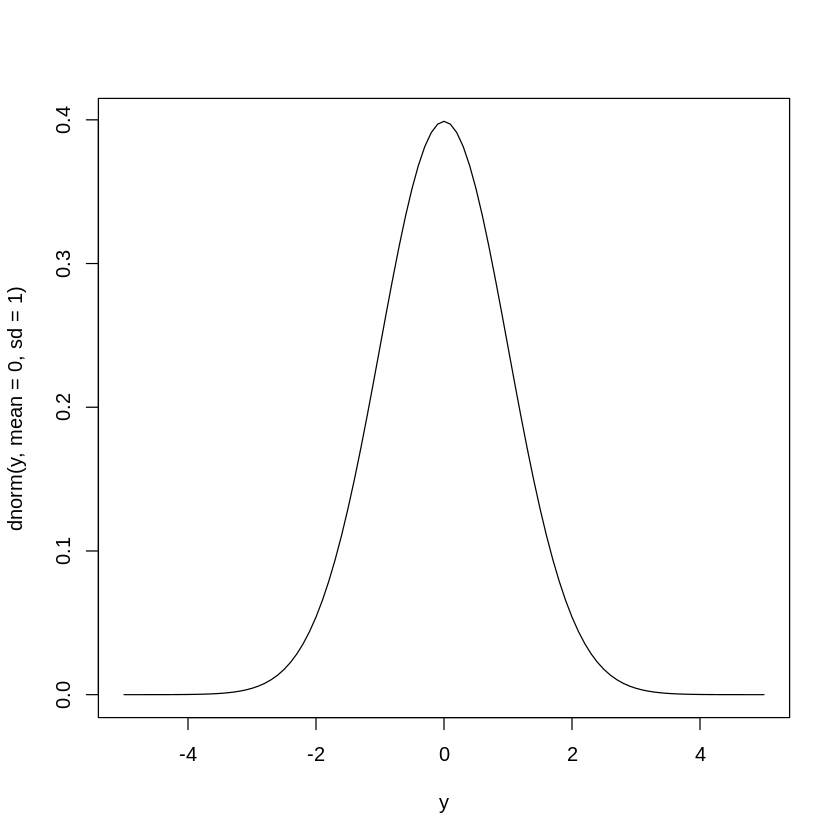

In [17]:
y <- seq(-5, 5, 0.1)
plot(y, dnorm(y, mean = 0, sd = 1), type = "l")

In [18]:
pnorm(1.8, 0, 1) - pnorm(1.2, 0, 1)

[1] 0.07913935

In [19]:
pnorm(1.5, 0, 1) * 0.6

[1] 0.5599157

## 6.8 gamma distribution

In [21]:
glm(y ~ log(x), family = Gamma(link = "log"), data = d2)


Call:  glm(formula = y ~ log(x), family = Gamma(link = "log"), data = d2)

Coefficients:
(Intercept)       log(x)  
     4.1288       0.3588  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    13.53 
Residual Deviance: 10.56 	AIC: 827.8